# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | paratinga
Processing Record 2 of Set 1 | kyzyl
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | villanueva
Processing Record 5 of Set 1 | tobelo
Processing Record 6 of Set 1 | imbituba
Processing Record 7 of Set 1 | fuerte olimpo
Processing Record 8 of Set 1 | tolanaro
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | el abiodh sidi cheikh
Processing Record 12 of Set 1 | meadow lakes
Processing Record 13 of Set 1 | shakhtinsk
Processing Record 14 of Set 1 | ust-nera
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | alpine
Processing Record 17 of Set 1 | dryden
Processing Record 18 of Set 1 | isafjordur
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | namibe
Processing Record 22 of Set 1 | hajin
Pro

Processing Record 40 of Set 4 | bardai
Processing Record 41 of Set 4 | thompson
Processing Record 42 of Set 4 | margaret river
Processing Record 43 of Set 4 | cabo san lucas
Processing Record 44 of Set 4 | tura
Processing Record 45 of Set 4 | katsuura
Processing Record 46 of Set 4 | mount pearl
Processing Record 47 of Set 4 | vila do maio
Processing Record 48 of Set 4 | carnarvon
Processing Record 49 of Set 4 | karatas
Processing Record 0 of Set 5 | tsiombe
Processing Record 1 of Set 5 | dalandzadgad
Processing Record 2 of Set 5 | olonkinbyen
Processing Record 3 of Set 5 | vorgashor
Processing Record 4 of Set 5 | haapsalu
Processing Record 5 of Set 5 | whitehorse
Processing Record 6 of Set 5 | nazyvayevsk
Processing Record 7 of Set 5 | kitgum
Processing Record 8 of Set 5 | kibondo
Processing Record 9 of Set 5 | umarkot
Processing Record 10 of Set 5 | metlili chaamba
Processing Record 11 of Set 5 | klyuchi
Processing Record 12 of Set 5 | leksand
Processing Record 13 of Set 5 | coeur d'a

Processing Record 33 of Set 8 | ambon
Processing Record 34 of Set 8 | am djarass
City not found. Skipping...
Processing Record 35 of Set 8 | taroa
Processing Record 36 of Set 8 | ribeira brava
Processing Record 37 of Set 8 | ridgecrest
Processing Record 38 of Set 8 | alzamay
Processing Record 39 of Set 8 | lospalos
Processing Record 40 of Set 8 | carbonear
Processing Record 41 of Set 8 | san patricio
Processing Record 42 of Set 8 | goure
Processing Record 43 of Set 8 | tazovsky
Processing Record 44 of Set 8 | moranbah
Processing Record 45 of Set 8 | banda aceh
Processing Record 46 of Set 8 | ashkasham
Processing Record 47 of Set 8 | glen innes
Processing Record 48 of Set 8 | mariehamn
Processing Record 49 of Set 8 | ebaye
Processing Record 0 of Set 9 | matoury
Processing Record 1 of Set 9 | bonny
Processing Record 2 of Set 9 | az zawiyah
Processing Record 3 of Set 9 | qarqaraly
Processing Record 4 of Set 9 | sur
Processing Record 5 of Set 9 | kununurra
Processing Record 6 of Set 9 | ca

Processing Record 24 of Set 12 | san fernando
Processing Record 25 of Set 12 | abong mbang
Processing Record 26 of Set 12 | gizo
Processing Record 27 of Set 12 | north druid hills
Processing Record 28 of Set 12 | fauske
Processing Record 29 of Set 12 | dzagam
Processing Record 30 of Set 12 | sao gabriel da cachoeira
Processing Record 31 of Set 12 | greenville
Processing Record 32 of Set 12 | dunedin
Processing Record 33 of Set 12 | pisco
Processing Record 34 of Set 12 | aykhal
Processing Record 35 of Set 12 | olyokminsk
Processing Record 36 of Set 12 | el porvenir
Processing Record 37 of Set 12 | langepas
Processing Record 38 of Set 12 | weirton
Processing Record 39 of Set 12 | villa gesell
Processing Record 40 of Set 12 | ambovombe
Processing Record 41 of Set 12 | changyon
Processing Record 42 of Set 12 | laguna
Processing Record 43 of Set 12 | klaeng
Processing Record 44 of Set 12 | mccook
Processing Record 45 of Set 12 | xanxere
-----------------------------
Data Retrieval Complete 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,paratinga,-12.6906,-43.1842,75.60,52,0,6.49,BR,1689560092
1,kyzyl,51.7000,94.4500,69.78,52,13,0.63,RU,1689560092
2,port-aux-francais,-49.3500,70.2167,35.65,55,84,8.21,TF,1689560058
3,villanueva,15.3167,-88.0000,83.39,79,20,9.22,HN,1689560093
4,tobelo,1.7284,128.0095,78.82,84,100,2.93,ID,1689560093


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,paratinga,-12.6906,-43.1842,75.60,52,0,6.49,BR,1689560092
1,kyzyl,51.7000,94.4500,69.78,52,13,0.63,RU,1689560092
2,port-aux-francais,-49.3500,70.2167,35.65,55,84,8.21,TF,1689560058
3,villanueva,15.3167,-88.0000,83.39,79,20,9.22,HN,1689560093
4,tobelo,1.7284,128.0095,78.82,84,100,2.93,ID,1689560093


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

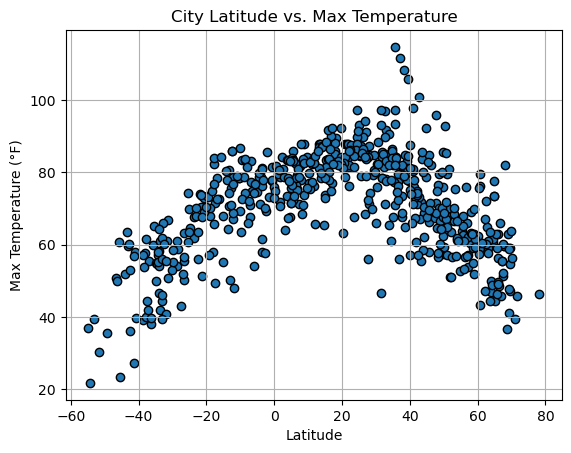

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

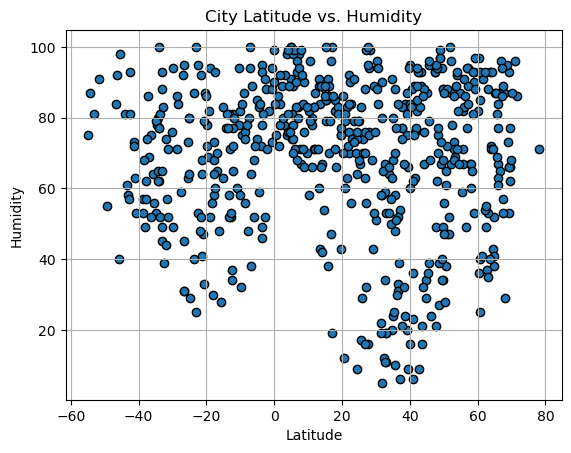

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

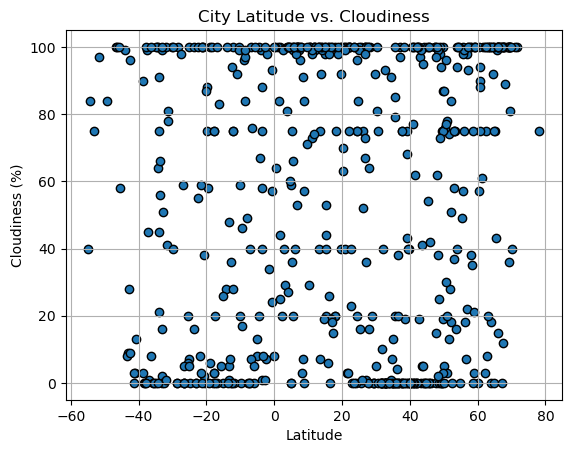

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

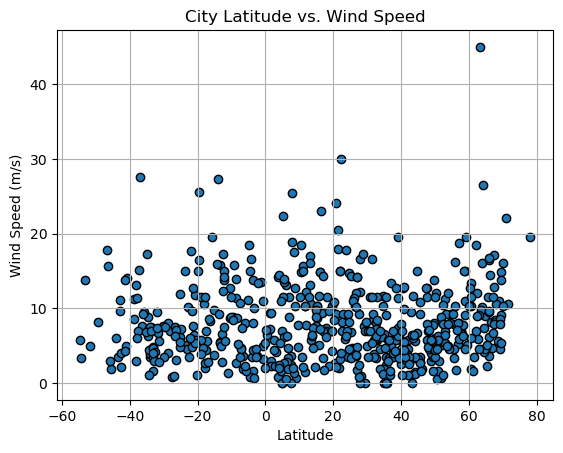

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x, y, x_label, y_label, title):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

    # Get regression values
    regress_values = x * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Calculate r-value
    r_value = rvalue ** 2
    
    # Create scatter plot
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    
    # Label plot and annotate the line equation
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq, (x.min(), y.max()), fontsize=15, color="red")
    
    

    
    # Print the r-value and linear regression equation
    print(f"The r-value is: {r_value:}")
    
    
    plt.show()


    

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df["Lat"]>=0)])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kyzyl,51.7000,94.4500,69.78,52,13,0.63,RU,1689560092
3,villanueva,15.3167,-88.0000,83.39,79,20,9.22,HN,1689560093
4,tobelo,1.7284,128.0095,78.82,84,100,2.93,ID,1689560093
10,el abiodh sidi cheikh,32.8930,0.5484,78.15,11,0,6.58,DZ,1689560094
11,meadow lakes,61.6247,-149.6011,58.73,91,100,3.44,US,1689560094


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df["Lat"]<=0)])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,paratinga,-12.6906,-43.1842,75.60,52,0,6.49,BR,1689560092
2,port-aux-francais,-49.3500,70.2167,35.65,55,84,8.21,TF,1689560058
5,imbituba,-28.2400,-48.6703,58.91,84,100,7.02,BR,1689560093
6,fuerte olimpo,-21.0415,-57.8738,70.38,47,100,6.40,PY,1689560093
7,tolanaro,-25.0319,46.9987,63.82,80,7,6.04,MG,1689560094


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.37571245226474037


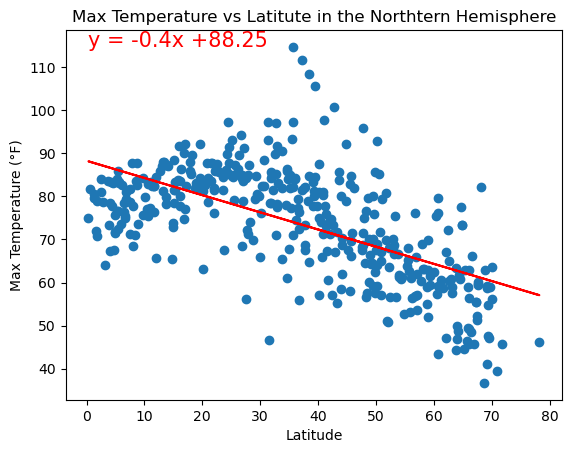

In [15]:
# Linear regression on Northern Hemisphere
create_linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],
                              'Latitude', 'Max Temperature (°F)', 'Max Temperature vs Latitute in the Northtern Hemisphere'
                             )

The r-value is: 0.5803233756463712


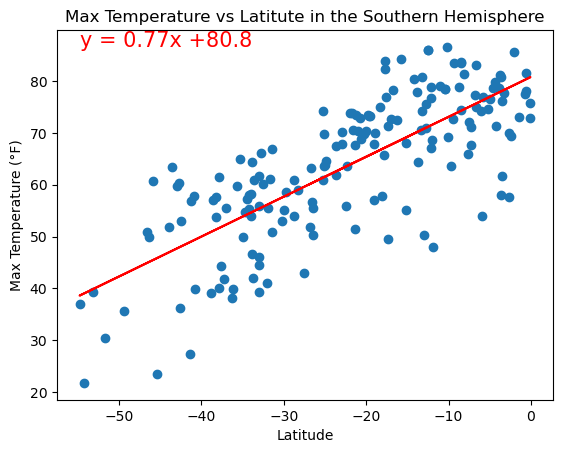

In [16]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(southern_hemi_df ['Lat'], southern_hemi_df ['Max Temp'],
                              'Latitude', 'Max Temperature (°F)', 'Max Temperature vs Latitute in the Southern Hemisphere')

**Discussion about the linear relationship:**

    For the Northern Hemisphere, the r-value of  0.37571245226474037 suggests a moderate positive linear relationship between Temperature and Latitude. As Latitude increases (moving away from the equator towards the North Pole), the Temperature tends to increase, but the relationship is not very strong.
    For the  Southern Hemisphere, the r-value of 0.5803233756463712 suggests a moderate positive linear relationship between Temperature and Latitude. As Latitude increases (moving away from the equator towards the South Pole), the Temperature tends to increase, and the relationship is relatively stronger compared to the Northern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.015207246605532758


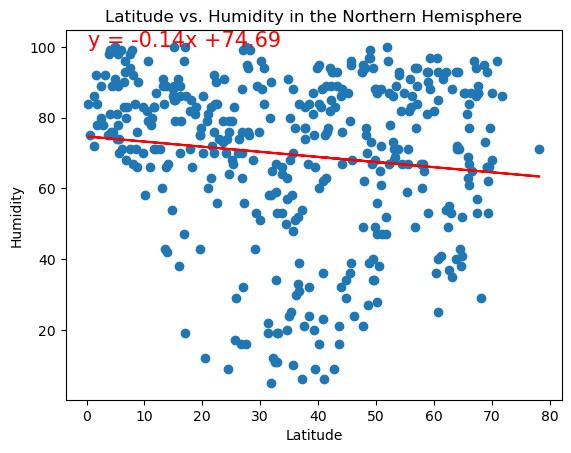

In [17]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],
                              'Latitude', 'Humidity', 'Latitude vs. Humidity in the Northern Hemisphere')

The r-value is: 0.004745343088774898


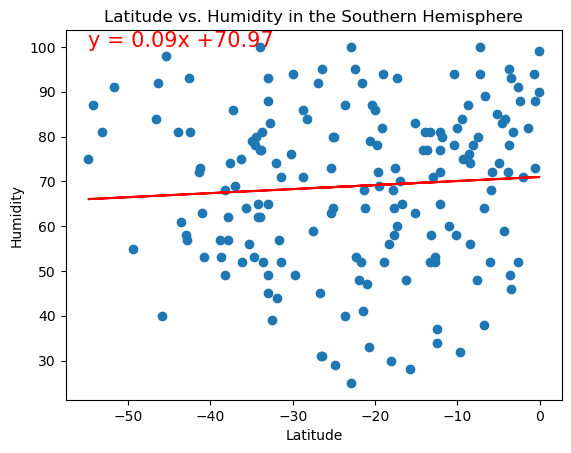

In [18]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df ['Lat'], southern_hemi_df ['Humidity'],
                              'Latitude', 'Humidity', 'Latitude vs. Humidity in the Southern Hemisphere')

**Discussion about the linear relationship:** 

For the Northern Hemisphere,the r-value of 0.015207246605532758 suggests a very weak positive linear relationship between Humidity and Latitude. The relationship between Humidity and Latitude in the Northern Hemisphere is practically negligible.

For the Southern Hemisphere, the r-value of 0.004745343088774898 suggests a very weak positive linear relationship between Humidity and Latitude in the Southern Hemisphere. Similar to the Northern Hemisphere, the relationship between Humidity and Latitude in the Southern Hemisphere is almost non-existent.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 9.320955862838835e-05


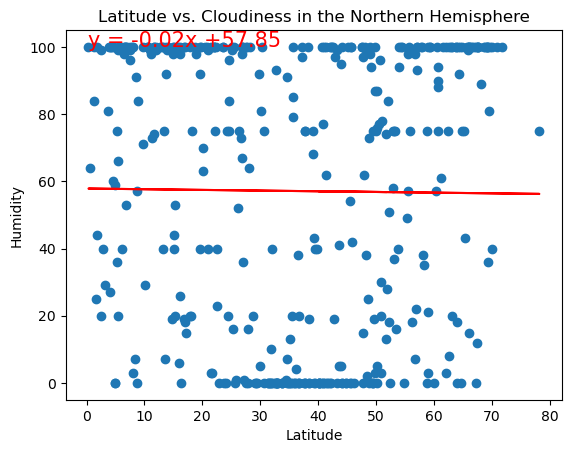

In [19]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],
                              'Latitude', 'Humidity', 'Latitude vs. Cloudiness in the Northern Hemisphere')

The r-value is: 0.0012058951955959889


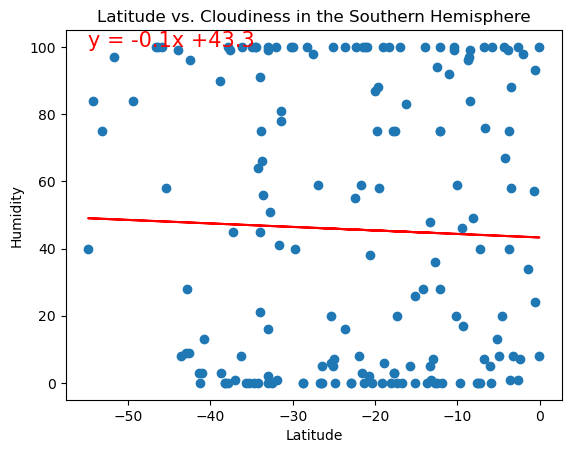

In [20]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df ['Lat'], southern_hemi_df ['Cloudiness'],
                              'Latitude', 'Humidity', 'Latitude vs. Cloudiness in the Southern Hemisphere')

**Discussion about the linear relationship:** 
 There is no significant correlation between Cloudiness and Latitude in either the Northern or Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0031280974430151777


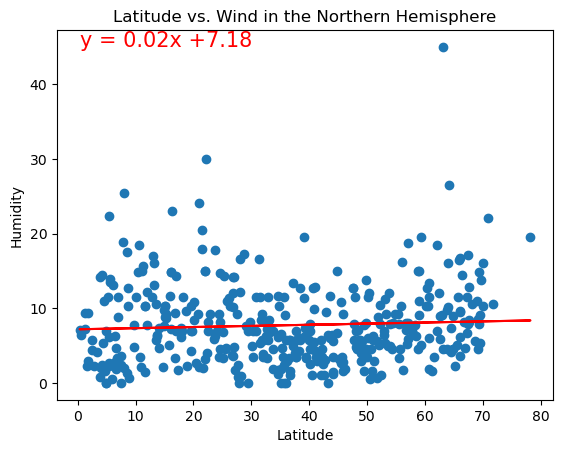

In [21]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],
                              'Latitude', 'Humidity', 'Latitude vs. Wind in the Northern Hemisphere')

The r-value is: 0.0011060536286521723


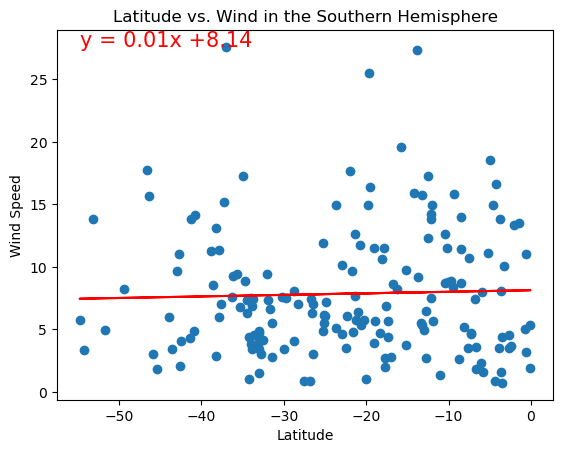

In [22]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df ['Lat'], southern_hemi_df ['Wind Speed'],
                              'Latitude', 'Wind Speed', 'Latitude vs. Wind in the Southern Hemisphere')

**Discussion about the linear relationship:** 
 there is no significant correlation between Wind Speed and Latitude in either the Northern or Southern Hemisphere.